In [3]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from gensim import corpora
import sddk

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.oauth2 import service_account # based on google-auth library

In [4]:
# for exporting data to googlesheets/sciencedata
# (feel free to skip)

s = sddk.cloudSession("sciencedata.dk")
# establish connection with gogglesheets...
file_data = s.read_file("https://sciencedata.dk/files/ServiceAccountsKey.json", "dict") # or load it from a local storage: json.load(open("../../ServiceAccountsKey.json", "r"))
credentials = service_account.Credentials.from_service_account_info(file_data)
gc = gspread.Client(auth=credentials.with_scopes(['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']))
paul_results = gc.open_by_url("https://docs.google.com/spreadsheets/d/1h4M-gK9TPIfeTV528tUuPBfZF1wtcNCA10yIlJYqGTE/edit?usp=sharing")

endpoint variable has been configured to: https://sciencedata.dk/files/


In [30]:
LAGTec = pd.read_json("../data/large_files/LAGTec.json")

In [31]:
len(LAGTec["author"].unique().tolist())

49

In [32]:
len(LAGTec)

148

In [17]:
LAGTec["wordcount"].sum()

3566823

In [ ]:
LAGTec

In [8]:
for date in [2, 2.5, 3, 3.5, 4, 4.5, 5]:
    mask = (LAGTc["date_avr"] <= date)
    print(date,
          mask.sum(),
          LAGTc[mask]["wordcount"].sum()
          )

2 103 1642004
2.5 104 1711991
3 105 1714782
3.5 137 3059696
4 143 3361426
4.5 148 3566823
5 148 3566823


In [23]:
LAGTec_by_date = pd.DataFrame(LAGTec.groupby("date_avr").sum()).reset_index()[["date_avr", "wordcount", "n_sentences", "sentences_paul_N", "sentences_apostle_N"]]
LAGTec_by_date

,date_avr,wordcount,n_sentences,sentences_paul_N,sentences_apostle_N
0,0.5,151723,10108,156,84
1,1.0,17640,1877,4,17
2,1.5,304761,39199,14,75
3,2.0,1167880,125080,478,629
4,2.5,69987,4394,7,15
5,3.0,2791,217,0,1
6,3.5,1344914,117382,205,689
7,4.0,301730,33023,117,110
8,4.5,205397,12038,64,36


In [29]:
LAGTec[LAGTec["date_avr"]==2]

,filename,author,title,wordcount,author_id,doc_id,raw_date,date_avr,date_probs,date_manual,provenience,tlg_epithet,clean_string,n_sentences,lemmatized_sentences,sentences_paul,sentences_paul_N,sentences_apostle,sentences_apostle_N
989,tlg0555.tlg001.perseus-grc1.xml,Clement of Alexandria,Protrepticus,24691,tlg0555,tlg0555.tlg001,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",2.5,christian,Theologici,Ἀμφίων ὁ Θηβαῖος καὶ Ἀρίων ὁ Μηθυμναῖος ἄμφω ...,2068,"[[ἀμφίων, Θηβαῖος, Ἄριοι, μηθυμναῖος, ἄμφω, εἰ...","[[θεοσέβεια, πᾶς, ὠφέλιμοσ, Παῦλος, ἐπαγγελία,...",2,"[[θεσπέσιος, κύριος, ἀπόστολος, χάρις, θεός, σ...",9
990,tlg0555.tlg002.opp-grc1.xml,Clement of Alexandria,Paedagogus,57001,tlg0555,tlg0555.tlg002,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",2.5,christian,Theologici,. Τί ἐπαγγέλλεται ὁ παιδαγωγός. . Ὅτι διὰ τὰς...,3410,"[[], [ἐπαγγέλλω, παιδαγωγός], [], [ἁμαρτία, πα...","[[οὗτος, σαφής, μακάριος, Παῦλος, ὑπεσημήνατο,...",11,"[[ἐμφαντικώτερον, ἀποκαλύπτων, κύριος, σημαινό...",60
991,tlg0555.tlg004.perseus-grc1.xml,Clement of Alexandria,Stromata (Books I-VI),131072,tlg0555,tlg0555.tlg004,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",2.5,christian,Theologici,(/ (\ = )/| )\ \ =| / )/. / ) )) (/ )\ \ / /;...,7599,"[[], [], [], [], [], [], [], [], [], [], [], [...",[],0,[],0
992,tlg0555.tlg005.opp-grc1.xml,Clement of Alexandria,Eclogae propheticae,4989,tlg0555,tlg0555.tlg005,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",2.5,christian,Theologici,"Οἱ ἀμφὶ τὸν Σεδράχ, Μισάκ, Ἀβδεναγὼ ἐν τῇ καμί...",354,"[[σεδράχ, μισάκ, ἀβδεναγὼ, κάμινος, πῦρ, ὑμνοῦ...",[],0,"[[κύριος, ἀπόστολος, φόβος, πόνος, ἀναστρέφω],...",8
993,tlg0555.tlg006.perseus-grc1.xml,Clement of Alexandria,Quis Dis Salvetur,9703,tlg0555,tlg0555.tlg006,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",2.5,christian,Theologici,Οἱ μὲν τοὺς ἐγκωμιαστικοὺς λόγους τοῖς πλουσίο...,747,"[[ἐγκωμιαστικοὺς, λόγος, πλούσιος, δωροφοροῦντ...","[[ὑπερβολή, ὁδός, δείκνυμι, Παῦλος, σωτηρία]]",1,"[[μέγεθος, σωτήρ, ἐκεῖνος, καινότης, χάρις, μα...",4
994,tlg0555.tlg007.opp-grc1.xml,Clement of Alexandria,Excerpta ex Theodoto,7529,tlg0555,tlg0555.tlg007,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",2.5,christian,Theologici,"»Πάτερ,« φησί, »παρατίθεμαί σοι εἰς χεῖρας τὸ...",494,"[[πατήρ, φημί, παρατίθημι, χείρ, πνεῦμα], [προ...","[[Παῦλος, ἔνδυσαι, καινός, ἄνθρωπος, θεός, κτί...",4,"[[ἀνάστασις, ἐμφυσῶν, πνεῦμα, ἀπόστολος, χοῦς,...",20
995,tlg0555.tlg008.perseus-grc1.xml,Clement of Alexandria,"Exhortation to Endurance, or to the Newly Bapt...",769,tlg0555,tlg0555.tlg008,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",2.5,christian,Theologici,"Ἡσυχίαν μὲν λόγοις ἐπιτήδευε, ἡσυχίαν δὲ ἔργο...",81,"[[ἡσυχία, λόγος, ἐπιτήδευε, ἡσυχία, ἔργον, γλῶ...",[],0,[],0
1189,tlg1665.tlg001.1st1K-grc1.xml,Seniores Apud Irenaeum,Reliquiae plurium anonymorum,695,tlg1665,tlg1665.tlg001,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",NaN,christian,Scriptores Ecclesiastici,". æ ; , , æ ; , æ æ , æ . , , . Ἡ γὰρ πλάνη (...",200,"[[], [], [], [], [], [πλάνη, æ], [], [], [], [...","[[δίκαιος, ἄνθρωπος, πνευματοφόροις, ἡτοιμάσθη...",1,"[[ὄις, πρέσβυς, ἀπόστολος, μανθάνω, μετατεθέντ...",2
1295,tlg2042.tlg001.perseus-grc1.xml,Origen,Contra Celsum,164838,tlg2042,tlg2042.tlg001,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",2.5,christian,Theologici,Ὁ μὲν σωτὴρ καὶ κύριος ἡμῶν Ἰησοῦς Χριστὸς ψε...,8391,"[[σωτήρ, κύριος, Ἰησοῦς, Χριστός, ψευδομαρτυρο...","[[Παῦλος, μυρίος, καταλέγω, εἰωθότα, χωρίζω, ἀ...",93,"[[ἄξιος, σεμνύνω, θλῖψις, χωριζούσῃ, αὐτός, κα...",64
1296,tlg2042.tlg005.opp-grc1.xml,Origen,Commentarii in Evangelium Joannis,189794,tlg2042,tlg2042.tlg005,A.D. 2-3,2.0,"{'1.5': 0.5, '2.5': 0.5}",2.5,christian,Theologici,ΤΟΜΟΣ Α΄. Ὃν τρόπον οἶμαι ό πάλαι »λαὸς« ἐπικλ...,23491,"[[τομός, α], [τρόπος, οἴομαι, λαός, ἐπικαλέω, ...","[[ἐπίστησον, λέγω, Παῦλος], [οἴομαι, εὐαγγέλιο...",97,"[[τὶς, ἀνθυποφέρῃ, νομίζω, ἀσεβέω, ἀρχιερεύς, ...",151


<AxesSubplot:xlabel='date_avr'>

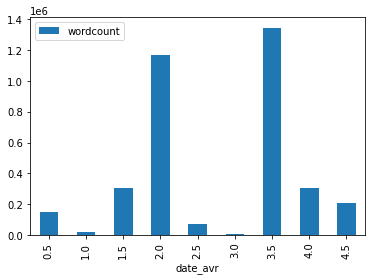

In [28]:
fig, ax = plt.subplots()
LAGTec_by_date.plot.bar(x="date_avr", y="wordcount", ax=ax)


In [ ]:
subselections = []
for date in dates:
    subselection = LAGTec[LAGTec["date_avr"]== date]
    wordcount = LAGTec[(LAGTec["date_avr"]== date)["wordcount"].sum()
    wordcount_pagan = AGT[(AGT["date_avr"]== date) & (AGT["provenience"]!="christian")]["wordcount"].sum()
    wordcount = subselection["wordcount"].sum()
    sentences = subselection["lemmatized_sentences"].apply(lambda x: len(x)).sum()
    doccount = len(subselection)
    date_string = date_avr_to_string(date)
    subselection_dict = {"date_string" : date_string, "column" : "date_avr", "value" : date, "wordcount" : wordcount, "sentences" : sentences, "wordcount_christian" : wordcount_christian, "wordcount_pagan" : wordcount_pagan, "doccount": doccount}
    subselections.append(subselection_dict)
subselections_df = pd.DataFrame(subselections)
subselections_df

In [ ]:
# function to extract all texts into one list of sentences
def get_flat_sentences(series):
    sentences_list = [sent for doc in series.tolist() for sent in doc]
    return sentences_list

# use the function
docs = get_flat_sentences(c_hippocraticum["lemmatized_sentences_repl"])

In [16]:
paul_wordlist = [w for wordlist in LAGTc["sentences_paul_wordlist"] for w in wordlist]

In [19]:
paul_wordlist_freqs = nltk.FreqDist(paul_wordlist).most_common()
paul_wordlist_freqs[:50]

[('Παῦλος', 1072),
 ('λέγω', 380),
 ('εἰμί', 215),
 ('θεός', 198),
 ('φημί', 167),
 ('οὗτος', 134),
 ('γίγνομαι', 130),
 ('Χριστός', 128),
 ('ἀπόστολος', 123),
 ('λόγος', 103),
 ('Ἰησοῦς', 103),
 ('πᾶς', 90),
 ('ἄνθρωπος', 79),
 ('ἅγιος', 74),
 ('πολύς', 68),
 ('ἐκκλησία', 64),
 ('κύριος', 63),
 ('ἔχω', 61),
 ('πνεῦμα', 56),
 ('αὐτός', 56),
 ('Ἰουδαῖος', 55),
 ('Πέτρος', 52),
 ('ἐπίσκοπος', 48),
 ('γράφω', 47),
 ('ποιέω', 44),
 ('ἄλλος', 43),
 ('ἀκούω', 39),
 ('μόνος', 39),
 ('υἱός', 38),
 ('τὶς', 38),
 ('ἐπιστολή', 38),
 ('σοφία', 38),
 ('πατήρ', 37),
 ('διδάσκω', 35),
 ('πίστις', 34),
 ('ὁράω', 32),
 ('ἀδελφός', 32),
 ('νόμος', 32),
 ('ἀνήρ', 31),
 ('οἶδα', 31),
 ('εὐαγγέλιον', 31),
 ('σῶμα', 31),
 ('ἔθνος', 30),
 ('Κορίνθιος', 30),
 ('πρῶτος', 29),
 ('πόλις', 29),
 ('ἡμέρα', 29),
 ('ὄνομα', 28),
 ('μέλλω', 28),
 ('δύναμις', 28)]

In [22]:
paul_wordlist_freqs_df = pd.DataFrame(paul_wordlist_freqs, columns=["word", "count"])
paul_wordlist_freqs_df[:100]

,word,count
0,Παῦλος,1072
1,λέγω,380
2,εἰμί,215
3,θεός,198
4,φημί,167
...,...,...
95,παρίστημι,16
96,λοιπός,16
97,νοέω,16
98,Ἰωάν(ν)ης,16


In [26]:
len(paul_wordlist_freqs_df[paul_wordlist_freqs_df["count"]>=5])

396

In [30]:
set_with_dataframe(paul_results.add_worksheet("paul_sentences_wordfreqs", 1,1), paul_wordlist_freqs_df[paul_wordlist_freqs_df["count"]>=5])